# Face Recognition 

#### Importamos Librerias

In [35]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Extraemos datos

In [36]:
dataDir = 'dataset/part1/part1/'
listImages = os.listdir(dataDir)

map_characters = {
    0: 'Male',
    1: 'Female'
}


#### Creamos el Dataset

In [37]:
images = []
ages = []
genders = []



for filename in listImages:
    file = filename.split('_')
    age = file[0]
    gender = file[1]
    ages.append(age)
    genders.append(gender)
    if filename.endswith('.jpg'):
        filePath = os.path.join(dataDir,filename)
        image = cv2.imread(filePath)
        if image is None:
            print(f"Error al leer la imagen: {filePath}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image= cv2.resize(image, (64,64))
        images.append(image)

#### Visualización de las imagenes

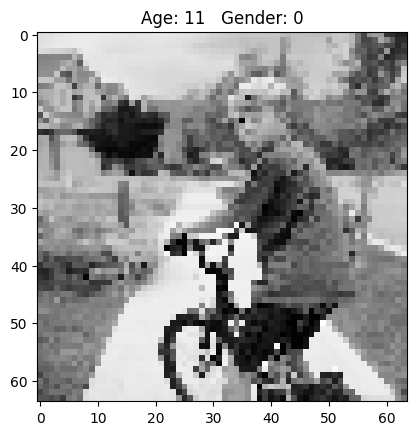

In [38]:
position = 155
if images:
    plt.title(f'Age: {ages[position]}   Gender: {genders[position]}')
    plt.imshow(images[position], cmap='gray')
    plt.show()

#### Preprocesamiento

In [39]:
# Convertimos a un array de numpy
images = np.array(images)
ages = np.array(ages, dtype=int)
genders = np.array(genders, dtype=int)

# Normalizamos de las imagenes
images = images / 255


#### Dividimos en conjunto de entrenamiento y test 

In [40]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

#### Arquitectura CNN

In [41]:
# Construir un modelo simple de clasificación con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Supongo que tienes dos géneros
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Entrenamos el modelo

In [42]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5637 - loss: 0.6862 - val_accuracy: 0.6395 - val_loss: 0.6347
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6498 - loss: 0.6156 - val_accuracy: 0.6494 - val_loss: 0.6131
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6775 - loss: 0.5911 - val_accuracy: 0.6652 - val_loss: 0.5933
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7050 - loss: 0.5530 - val_accuracy: 0.6775 - val_loss: 0.5809
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7260 - loss: 0.5233 - val_accuracy: 0.6746 - val_loss: 0.6025
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7663 - loss: 0.4687 - val_accuracy: 0.6889 - val_loss: 0.5809
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8019 - loss: 0.4204 - val_accuracy: 0.6854 - val_loss: 0.6173
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8422 - loss: 0.3551 - val_accu

#### Evaluamos el modelo 

In [56]:

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7072 - loss: 1.0153
Precisión en el conjunto de prueba: 0.6987179517745972


#### Guardamos el modelo

In [57]:
model.save('gender_classification_model.keras')

#### Nuestra camara

In [58]:
# Función que toma un frame de nuetra camara
def capture_image():
    # Iniciar la captura de video (0 es usualmente el índice de la cámara por defecto)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("No se pudo abrir la cámara")
        exit()

    print("La cámara se abrió correctamente")

    while True:
        ret, frame = cap.read()
        
        cv2.imwrite('frame.jpg', frame)
        print("Frame capturado y guardado como 'frame.jpg'")

        break
        
    # Liberar la captura
    cap.release()
    print("Captura liberada correctamente")
    return frame


In [59]:
'''
# Probamos que nuestra camara este funcionando 
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
plt.title('Imagen Capturada')
plt.imshow(captured_image)
plt.axis('off')
plt.show() 

'''

"\n# Probamos que nuestra camara este funcionando \ncaptured_image = capture_image()\ncaptured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)\nplt.title('Imagen Capturada')\nplt.imshow(captured_image)\nplt.axis('off')\nplt.show() \n\n"

#### Testeamos el modelo con nuestra camara

In [60]:
# captured_image = capture_image()
# captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(image, (64, 64))
# image = image / 255.0
# image = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal
# image = np.expand_dims(image, axis=0)
# model = tf.keras.models.load_model('gender_classification_model.keras')
# prediction = model.predict(image)
# gender = 'Hombre' if prediction[0] <= 0.5 else "Mujer"
# print(f"Predicción: {gender} ({prediction[0]})")
# plt.title(f"Predicción: {gender}({prediction[0]})")
# plt.imshow(captured_image)
# plt.axis('off')
# plt.show() 

#### Convertimos a TF Lite


In [61]:
# Cargar el modelo sin recompilar
loaded_model = tf.keras.models.load_model('gender_classification_model.keras', compile=False)
# Compilamos
loaded_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

#Convertir el modelo cargado a TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Guardamos el modelo TFLite 
open('gender_classification_model.tflite', 'wb').write(tflite_model)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7072 - loss: 1.0153
Precisión en el conjunto de prueba: 0.6987179517745972
INFO:tensorflow:Assets written to: C:\Users\ivoto\AppData\Local\Temp\tmp4c0ngka3\assets


INFO:tensorflow:Assets written to: C:\Users\ivoto\AppData\Local\Temp\tmp4c0ngka3\assets


Saved artifact at 'C:\Users\ivoto\AppData\Local\Temp\tmp4c0ngka3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2231485450576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485452304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485449424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485451920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485454032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485451152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485452880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2231485450960: TensorSpec(shape=(), dtype=tf.resource, name=None)


6502196

#### Evaluamos el modelo lite

In [62]:
# Evaluar el modelo en el conjunto de prueba
correct_predictions = 0
for i in range(len(X_test)):
    # Preprocesar la imagen de prueba (si no está ya preprocesada)
    image = X_test[i].astype(np.float32)
    image = np.expand_dims(image, axis=0)  # Añadir dimensión para el batch

    # Determinar la predicción binaria
    predicted_label = 0 if prediction <= 0.5 else 1

    # Comparar con la etiqueta real
    if predicted_label == y_test[i]:
        correct_predictions += 1

# Calcular la precisión
test_acc = correct_predictions / len(X_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

Precisión en el conjunto de prueba: 0.4511834319526627


#### Probamos el modelo lite con nuestra camara

In [63]:
'''
# Probamos el modelo con nuestra camara
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))
image = image / 255.0
image = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal
image = np.expand_dims(image, axis=0)

# Convertir la imagen a FLOAT32
image = image.astype(np.float32)

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path='gender_classification_model.tflite')
interpreter.allocate_tensors()

# Obtener detalles de entrada y salida del modelo
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ejecutar la inferencia
interpreter.set_tensor(input_details[0]['index'], image)
interpreter.invoke()

# Obtener el resultado de la inferencia
output_data = interpreter.get_tensor(output_details[0]['index'])
prediction = output_data[0][0]

# Determinar el género basado en la predicción
gender = 'Hombre' if prediction <= 0.5 else 'Mujer'
print(f"Predicción: {gender} ({prediction})")

# Mostrar la imagen y la predicción
plt.title(f"Predicción: {gender} ({prediction})")
plt.imshow(captured_image)
plt.axis('off')
plt.show()
'''

'\n# Probamos el modelo con nuestra camara\ncaptured_image = capture_image()\ncaptured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)\nimage = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)\nimage = cv2.resize(image, (64, 64))\nimage = image / 255.0\nimage = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal\nimage = np.expand_dims(image, axis=0)\n\n# Convertir la imagen a FLOAT32\nimage = image.astype(np.float32)\n\n# Cargar el modelo TFLite\ninterpreter = tf.lite.Interpreter(model_path=\'gender_classification_model.tflite\')\ninterpreter.allocate_tensors()\n\n# Obtener detalles de entrada y salida del modelo\ninput_details = interpreter.get_input_details()\noutput_details = interpreter.get_output_details()\n\n# Ejecutar la inferencia\ninterpreter.set_tensor(input_details[0][\'index\'], image)\ninterpreter.invoke()\n\n# Obtener el resultado de la inferencia\noutput_data = interpreter.get_tensor(output_details[0][\'index\'])\nprediction = output_data[0][0]\n\n#